In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
a = tf.constant(5)
a

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [5]:
b = tf.constant(10)
c = tf.add(a,b)
print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [6]:
var1 = tf.Variable(20)
var1

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=20>

In [7]:
var2 = tf.Variable([[1,2],[3,4]])
var3 = tf.Variable([[5,6],[7,8]])
var4 = tf.matmul(var2,var3)
var4

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]])>

In [9]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


In [10]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


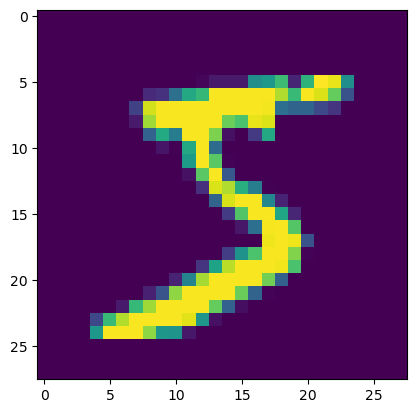

5


In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [13]:
x_train = x_train.reshape(x_train.shape[0] , -1)/255.0
x_test = x_test.reshape(x_test.shape[0] , -1)/255.0

y_train = tf.keras.utils.to_categorical(y_train)#OneHotEncode
y_test = tf.keras.utils.to_categorical(y_test)#OneHotEncode

In [15]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,)))
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))


In [22]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [27]:
model.fit(x_train,y_train,epochs=20,batch_size=512)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 4.4493e-04
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9775 - loss: 0.0750
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9925 - loss: 0.0228
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9960 - loss: 0.0122
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9985 - loss: 0.0053
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9982 - loss: 0.0052
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9997 - loss: 0.0013
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9999 - loss: 8.0876e-04
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 5.1079e-04
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 1.8659e-04
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 1.0342e-04
Epoch 12/20
118/118 ━

In [28]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.1028


[0.08279464393854141, 0.9850999712944031]

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)

In [31]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate,Input

In [32]:
input = Input(shape=[784,])
h1 = Dense(256 , activation = 'relu')(input)
h2 = Dense(256 , activation = 'relu')(h1)
h3 = Dense(256 , activation = 'relu')(input)
concat = Concatenate()([h2,h3])
output = Dense(10,activation = "softmax")(concat)

In [42]:
model = Model(inputs = [input] , outputs = [output])

In [43]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [44]:
model.fit(x_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9937 - loss: 0.0189
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9984 - loss: 0.0060
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9992 - loss: 0.0029
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9985 - loss: 0.0057
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9989 - loss: 0.0040
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9994 - loss: 0.0021
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9996 - loss: 0.0018
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9998 - loss: 0.0011
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9998 - loss: 6.3977e-04
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9996 - loss: 0.0018


In [45]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.1554


[0.13309764862060547, 0.9753999710083008]

In [46]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 784)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 256)               │         200,960 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 256)               │          65,792 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 256)               │         200,960 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 512)               │               0 │ dense_7[0][0],             │
│                               │                           │                 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 10)                │           5,130 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,418,528 (5.41 MB)

 Trainable params: 472,842 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 945,686 (3.61 MB)

In [47]:
 #creating our own custom layers

In [48]:
from tensorflow.keras import layers

In [113]:
class MyLayer(layers.Layer):
    def __init__(self ,units ,input_dim ,activation ):
        super(MyLayer, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value = w_init(shape = (input_dim,units), dtype = 'float32'),trainable = True)
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(initial_value = b_init(shape = (units,), dtype = 'float32'),trainable = True)
        self.activation = activation
    def call(self , inputs):
        inputs = tf.cast(inputs, tf.float32)
        linear_op = tf.matmul(inputs, self.w) + self.b
        if self.activation == 'relu':
            return tf.nn.relu(linear_op)
        elif self.activation == 'softmax':
            return tf.nn.softmax(linear_op)

In [114]:
class MyModel(tf.keras.Model):
    def __init__(self , n_input , n_hidden1 , n_hidden2 , n_classes):
        super(MyModel, self).__init__()
        self.layer1 = MyLayer(n_hidden1, n_input, "relu")
        self.layer2 = MyLayer(n_hidden2, n_hidden1 , "relu")
        self.out_layer = MyLayer(n_classes, n_hidden2, "softmax")
    def call(self, inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        return self.out_layer(x)

In [115]:
model = MyModel(784, 256, 256, 10)

In [116]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [117]:
model.fit(x_train ,y_train , epochs = 20 , batch_size = 512)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1024 - loss: 2.3270
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1028 - loss: 2.3268
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1017 - loss: 2.3273
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1013 - loss: 2.3264
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1013 - loss: 2.3254
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1023 - loss: 2.3259
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1027 - loss: 2.3265
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1023 - loss: 2.3274
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1003 - loss: 2.3266
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1016 - loss: 2.3269
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1039 - loss: 2.3272
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [118]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0980 - loss: 2.3253


[2.3274102210998535, 0.10329999774694443]